In [2]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import MDAnalysis as mda
from MDAnalysis import transformations
import nglview as nv

import re,os

%run -i _external_classes.py
%run -i _external_functions.py
%run -i _external_constants.py

## Build all-atom (AA) simulation system

In [3]:
%%capture
if 0:
    num = 300; lx=ly=lz=50
    filename = './simbox.xyz'
    if os.path.isfile(filename): os.remove(filename)
    ! fftoolx $num c8c1im.zmat $num bf4.zmat -b $lx,$ly,$lz -c -t 2.5
    ! packmol < pack.inp
    ! fftoolx $num c8c1im.zmat $num bf4.zmat -b $lx,$ly,$lz -c -t 2.5 -l -a
    os.system('mv data.lmp data_AA.lmp')
    os.system('mv pair.lmp pair_AA.lmp')

## Load AA-MD trajectory

In [4]:
num = 300 # il_pair
T = 300 #K 
kBT = kB*T*1e-3*NA #kJ/mol

AAdirectory = './AA/'
CGdirectory = './CG/'
print(AAdirectory,CGdirectory)

./AA/ ./CG/


In [5]:
filename = './data_AA.lmp'
AAatom_types,AAchemical_symbols = type_element(filename)

topo = AAdirectory+'result_atoms.data'
traj = AAdirectory+'result_atoms.lammpstrj'
AAtraj = read_traj(topo,traj,num,AAatom_types,AAchemical_symbols)

sel = AAtraj.select_atoms('not element H')
view = nv.show_mdanalysis(sel)
view.clear_representations()
view.add_representation(repr_type='licorice',radius='0.4')
view.add_unitcell()
view.center()
view.camera = 'orthographic'
view

atom types:        [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
chemical symbols:  ['N', 'C', 'C', 'C', 'H', 'C', 'H', 'H', 'C', 'C', 'H', 'C', 'B', 'F']
There are 501 frames in ./AA/result_atoms.data and ./AA/result_atoms.lammpstrj


NGLWidget(max_frame=500)

In [6]:
if 1:
    write_xyz(AAtraj,connect=True,interval=500)

* H atoms are hidden in this image.

<img title="image" alt="image" src="./images/AA.png" width="400">

## Build CG model for the cation

In [7]:
mol_name = 'c8c1im'
molAA = AAtraj.select_atoms('resid 1')
mol_resname = 'cation'
mapper_file = 'cgbuilder_%s.ndx' %mol_name
mol_info = [mol_name,mol_resname,molAA,mapper_file]

## write a pdb file for molecules
if 0:
    print('Write PDB file for %s ...' %mol_name)
    molAA.write("%s.pdb" %mol_name)

In [8]:
molA = Mol(mol_info,AAdirectory,CGdirectory)

read CG mapper ...
    id    name    uname    mass      charge    atom_indices
     0    TN2q     TN2q     29.042    0.296     [0, 5, 10, 11, 12]
                                                ['N' 'C' 'H' 'H' 'H']
     1     TC6      TC6     26.038    0.128     [3, 4, 8, 9]
                                                ['C' 'C' 'H' 'H']
     2    TN2q    TN2qx     41.053    0.272     [1, 2, 6, 7, 14, 15]
                                                ['C' 'N' 'H' 'C' 'H' 'H']
     3     SC3      SC3     42.081    0.104     [13, 16, 17, 18, 19, 20, 21, 23, 24]
                                                ['C' 'C' 'H' 'H' 'C' 'H' 'H' 'H' 'H']
     4      C1       C1     57.116    0.000     [22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
                                                ['C' 'C' 'H' 'H' 'C' 'H' 'H' 'C' 'H' 'H' 'H' 'H' 'H']
    molecule c8c1im  5 beads for  37 atoms  m = 195.3300  q = 0.8000


In [9]:
# bonds
bonds = []
for i in range(molA.nbead):
    if i>0: bonds.append([i,i-1])
bonds.append([0,2])
molA.connectivity(bonds)

analyse CG connectivity ...
    5 bonds:      [[4, 3], [3, 2], [2, 1], [2, 0], [1, 0]]
    6 angles:     [[4, 3, 2], [3, 2, 1], [3, 2, 0], [2, 1, 0], [2, 0, 1], [1, 2, 0]]
    4 dihedrals:  [[4, 3, 2, 1], [4, 3, 2, 0], [3, 2, 1, 0], [3, 2, 0, 1]]


calulcate bond, angle and diherdal distribution from AA simulation ...
calulcate bond, angle and diherdal potentials from AA simulation ...
BONDS:


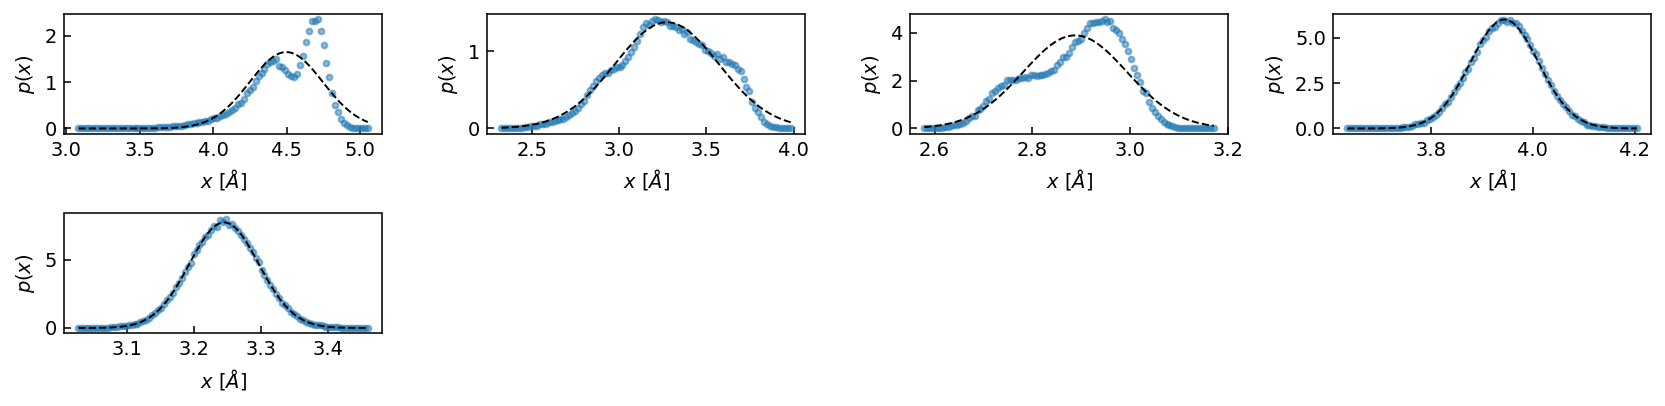

      bond    4    3  C1-SC3  harm [ 4.49598789 40.23445946]
      bond    3    2  SC3-TN2qx  harm [ 3.27336693 28.24956525]
      bond    2    1  TN2qx-TC6  harm [  2.88763571 221.09678952]
      bond    2    0  TN2qx-TN2q  harm [  3.94398499 559.52875314]
      bond    1    0  TC6-TN2q  harm [  3.24505138 933.31678375]
ANGLES:


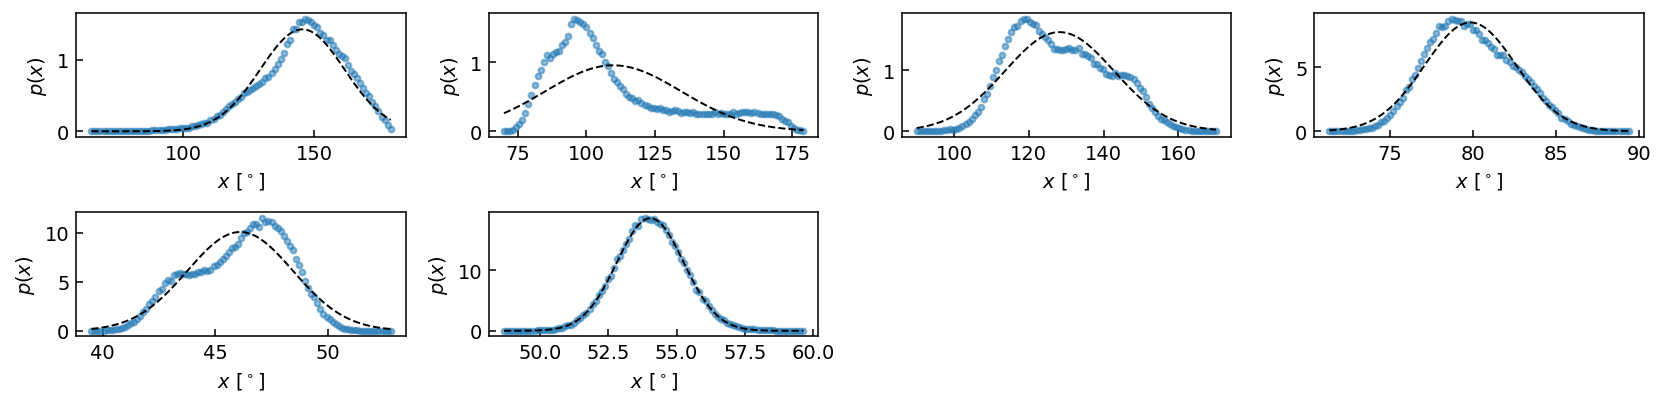

      angle    4    3    2  C1-SC3-TN2qx  harm [145.56551069  31.54086095]
      angle    3    2    1  SC3-TN2qx-TC6  harm [109.74907785  13.37538263]
      angle    3    2    0  SC3-TN2qx-TN2q  harm [128.19285623  38.324062  ]
      angle    2    1    0  TN2qx-TC6-TN2q  harm [  79.85782729 1076.73383559]
      angle    2    0    1  TN2qx-TN2q-TC6  harm [  46.10553909 1485.4927022 ]
      angle    1    2    0  TC6-TN2qx-TN2q  harm [  54.03663522 5469.28381942]
DIHERALS:


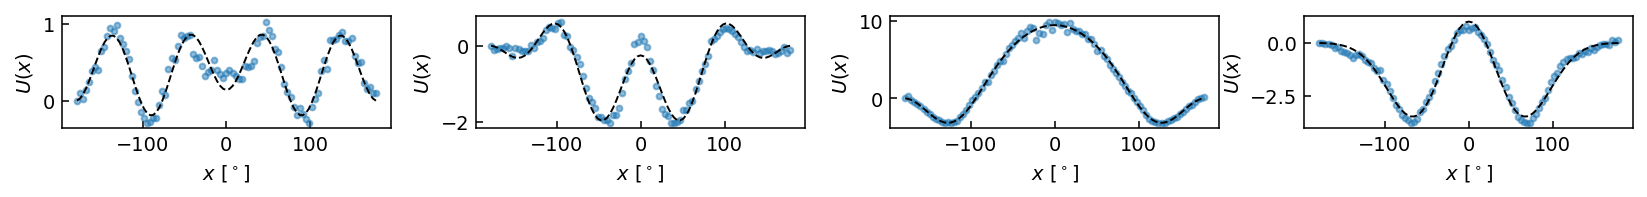

      dihedral    4    3    2    1  C1-SC3-TN2qx-TC6  opls 90.6 [ 0.07430189 -0.25795163  0.06807849  0.90448867]
      dihedral    4    3    2    0  C1-SC3-TN2qx-TN2q  opls 79.6 [-1.37527758  0.45997277  1.1193778  -1.19290578]
      dihedral    3    2    1    0  SC3-TN2qx-TC6-TN2q  opls 128.7 [11.9477875  -4.0463135  -2.51447305 -0.57696348]
      dihedral    3    2    0    1  SC3-TN2qx-TN2q-TC6  opls 82.8 [-0.9884738  -3.15236247  2.00217855 -0.3579666 ]
write .zmat and .ff files for c8c1im ...


In [10]:
cal_BAD_distributions(molA,AAtraj,interval=1,label='AA')
cal_BAD_potentials(molA,kBT)
molA.write_zmat_ff()

In [11]:
mol_name = 'BF4'
molAA = AAtraj.select_atoms('resid 301')
mol_resname = 'anion'
mapper_file = 'cgbuilder_%s.ndx' %mol_name
mol_info = [mol_name,mol_resname,molAA,mapper_file]

## write a pdb file for molecules
if 0:
    print('Write PDB file for %s ...' %mol_name)
    molAA.write("%s.pdb" %mol_name)

molB = Mol(mol_info,AAdirectory,CGdirectory)

# bonds
bonds = []
molB.connectivity(bonds)

cal_BAD_distributions(molB,AAtraj,interval=100,label='AA')
cal_BAD_potentials(molB,kBT)

molB.write_zmat_ff()

read CG mapper ...
    id    name    uname    mass      charge    atom_indices
     0      Q2       Q2     86.803    -0.800     [0, 1, 2, 3, 4]
                                                ['B' 'F' 'F' 'F' 'F']
    molecule BF4  1 beads for  5 atoms  m = 86.8030  q = -0.8000
analyse CG connectivity ...
    0 bonds:      []
    0 angles:     []
    0 dihedrals:  []
calulcate bond, angle and diherdal distribution from AA simulation ...
write .zmat and .ff files for BF4 ...


## Build CG simulation system

In [12]:
os.system('cp %s/*CG.zmat ./' %AAdirectory)
os.system('cp %s/*CG.ff ./' %AAdirectory)

0

In [13]:
%%capture
if 1:
    lx=ly=lz=50
    filename = './simbox.xyz'
    if os.path.isfile(filename): os.remove(filename)
    ! fftoolx $num c8c1im_CG.zmat $num BF4_CG.zmat -p xyz -b $lx,$ly,$lz -c -t 2.5
    ! packmol < pack.inp
    ! fftoolx $num c8c1im_CG.zmat $num BF4_CG.zmat -p xyz -b $lx,$ly,$lz -c -t 2.5 -l
    os.system('mv data.lmp data_CG.lmp')

In [14]:
bead_names = [bd.name for bd in molA.beads] + [bd.name for bd in molB.beads]
print(bead_names)
cal_lj_potential(bead_names)

['TN2q', 'TC6', 'TN2q', 'SC3', 'C1', 'Q2']
lj parameters in ./pair_CG.lmp
pair_coeff   1   1   0.4828   3.4000 #  TN2q   TN2q
pair_coeff   1   2   0.4828   3.4000 #  TN2q    TC6
pair_coeff   1   3   0.4828   3.4000 #  TN2q   TN2q
pair_coeff   1   4   0.5043   3.6500 #  TN2q    SC3
pair_coeff   1   5   0.5043   3.9500 #  TN2q     C1
pair_coeff   1   6   0.9670   3.9500 #  TN2q     Q2
pair_coeff   2   2   0.4230   3.4000 #   TC6    TC6
pair_coeff   2   3   0.4828   3.4000 #   TC6   TN2q
pair_coeff   2   4   0.4183   3.6500 #   TC6    SC3
pair_coeff   2   5   0.3991   3.9500 #   TC6     C1
pair_coeff   2   6   0.6807   3.9500 #   TC6     Q2
pair_coeff   3   3   0.4828   3.4000 #  TN2q   TN2q
pair_coeff   3   4   0.5043   3.6500 #  TN2q    SC3
pair_coeff   3   5   0.5043   3.9500 #  TN2q     C1
pair_coeff   3   6   0.9670   3.9500 #  TN2q     Q2
pair_coeff   4   4   0.5617   4.1000 #   SC3    SC3
pair_coeff   4   5   0.6979   4.3000 #   SC3     C1
pair_coeff   4   6   0.6262   4.3000 #   S

## Load and view CGMD trajectory

In [15]:
CGatom_types = np.array([1,2,3,4,5,6])
CGchemical_symbols = ['N', 'N', 'N', 'C','C', 'B']

topo = CGdirectory+'result_atoms.data'
traj = CGdirectory+'result_atoms.lammpstrj'
CGtraj = read_traj(topo,traj,num,CGatom_types,CGchemical_symbols)

view = nv.show_mdanalysis(CGtraj)
view.clear_representations()
view.add_representation(repr_type='licorice',radius='0.6')
view.add_unitcell()
view.camera = 'orthographic'
view.center()
view

There are 201 frames in ./CG/result_atoms.data and ./CG/result_atoms.lammpstrj


NGLWidget(max_frame=200)

<img title="image" alt="image" src="./images/CG.png" width="400">

In [16]:
if 0:
    write_pdb(CGtraj,bonds='conect',interval=500)

## Analyse CG bonds, angles, etc.

calulcate bond, angle and diherdal distribution from CG simulation ...
compare bond, angle and diherdal from AA and CG simulations ...
BONDS:


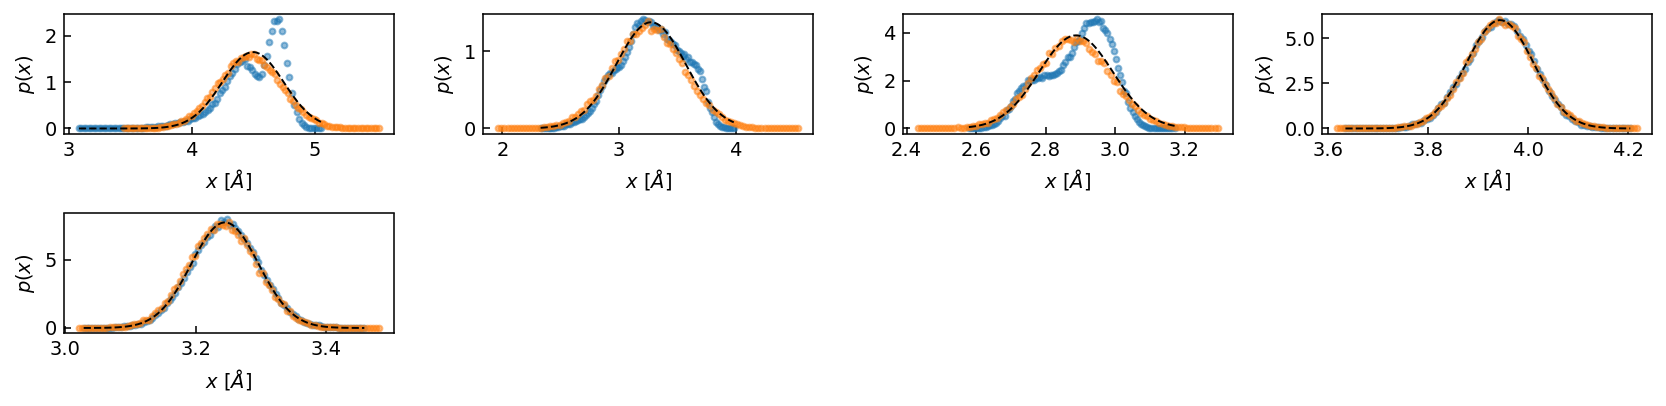

      ANGLES:


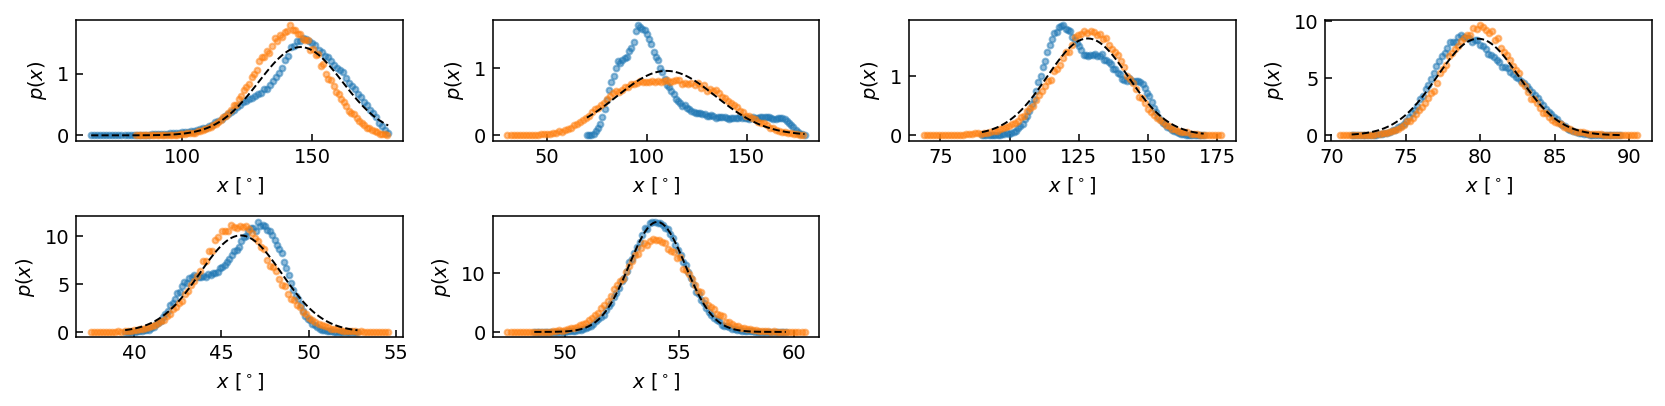

      DIHEDRALS:


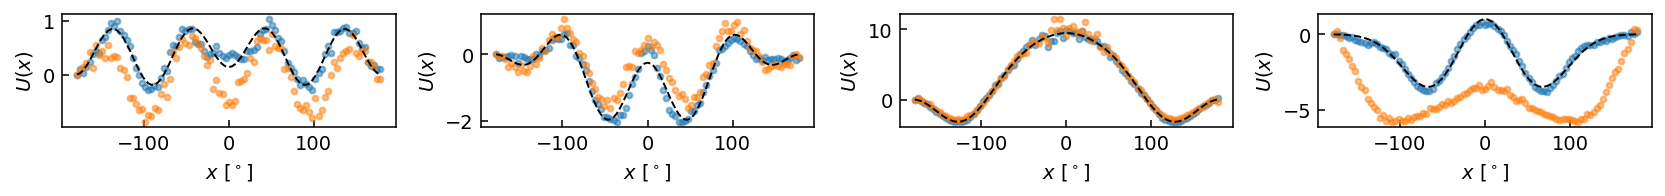

In [17]:
cal_BAD_distributions(molA,CGtraj,interval=1,label='CG')
compare_BAD_distributions(molA,kBT)